In [23]:
# Import the custom library
import graph_algorithms as ga

# Graph search

## Graph definition

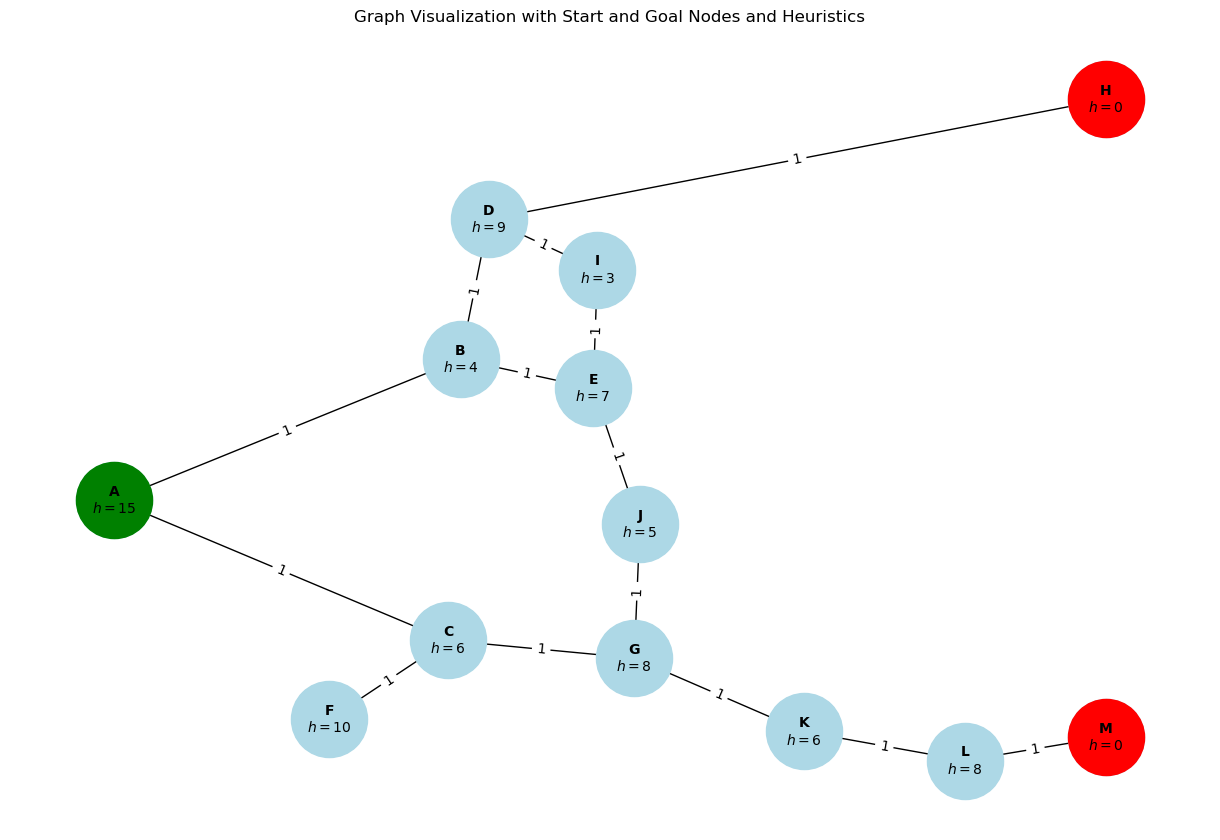

In [24]:
# Define the graph, costs, and heuristics
graph = {
    'A': {'B': 1, 'C': 1},
    'B': {'A': 1, 'E': 1, 'D': 1},
    'C': {'A': 1, 'F': 1, 'G': 1},
    'D': {'B': 1, 'I': 1, 'H': 1},
    'E': {'B': 1, 'I': 1, 'J': 1},
    'F': {'C': 1},
    'G': {'C': 1, 'K': 1, 'J': 1},
    'H': {'D': 1},
    'I': {'D': 1, 'E': 1},
    'J': {'E': 1, 'G': 1},
    'K': {'G': 1, 'L': 1},
    'L': {'K': 1, 'M': 1},
    'M': {'L': 1}
}

heuristics = {
    'A': 15,
    'B': 4,
    'C': 6,
    'D': 9,
    'E': 7,
    'F': 10,
    'G': 8,
    'H': 0,
    'I': 3,
    'J': 5,
    'K': 6,
    'L': 8,
    'M': 0
}

start_node = 'A'
goal_nodes = {'H', 'M'}

# Visualize the graph
ga.visualize_graph(graph, heuristics, start_node, goal_nodes)

## A* algorithm

Visiting node: A, f(n): 15, g(n): 0, h(n): 15, Path: ['A']
Visiting node: B, f(n): 5, g(n): 1, h(n): 4, Path: ['A', 'B']
Visiting node: C, f(n): 7, g(n): 1, h(n): 6, Path: ['A', 'C']
Visiting node: E, f(n): 9, g(n): 2, h(n): 7, Path: ['A', 'B', 'E']
Visiting node: I, f(n): 6, g(n): 3, h(n): 3, Path: ['A', 'B', 'E', 'I']
Visiting node: J, f(n): 8, g(n): 3, h(n): 5, Path: ['A', 'B', 'E', 'J']
Visiting node: G, f(n): 10, g(n): 2, h(n): 8, Path: ['A', 'C', 'G']
Visiting node: K, f(n): 9, g(n): 3, h(n): 6, Path: ['A', 'C', 'G', 'K']
Visiting node: D, f(n): 11, g(n): 2, h(n): 9, Path: ['A', 'B', 'D']
Visiting node: H, f(n): 3, g(n): 3, h(n): 0, Path: ['A', 'B', 'D', 'H']

Goal H reached! Total cost: 3, Path: ['A', 'B', 'D', 'H']
Visited nodes: [('A', 0, 15, 15), ('B', 1, 4, 5), ('C', 1, 6, 7), ('E', 2, 7, 9), ('I', 3, 3, 6), ('J', 3, 5, 8), ('G', 2, 8, 10), ('K', 3, 6, 9), ('D', 2, 9, 11), ('H', 3, 0, 3)]



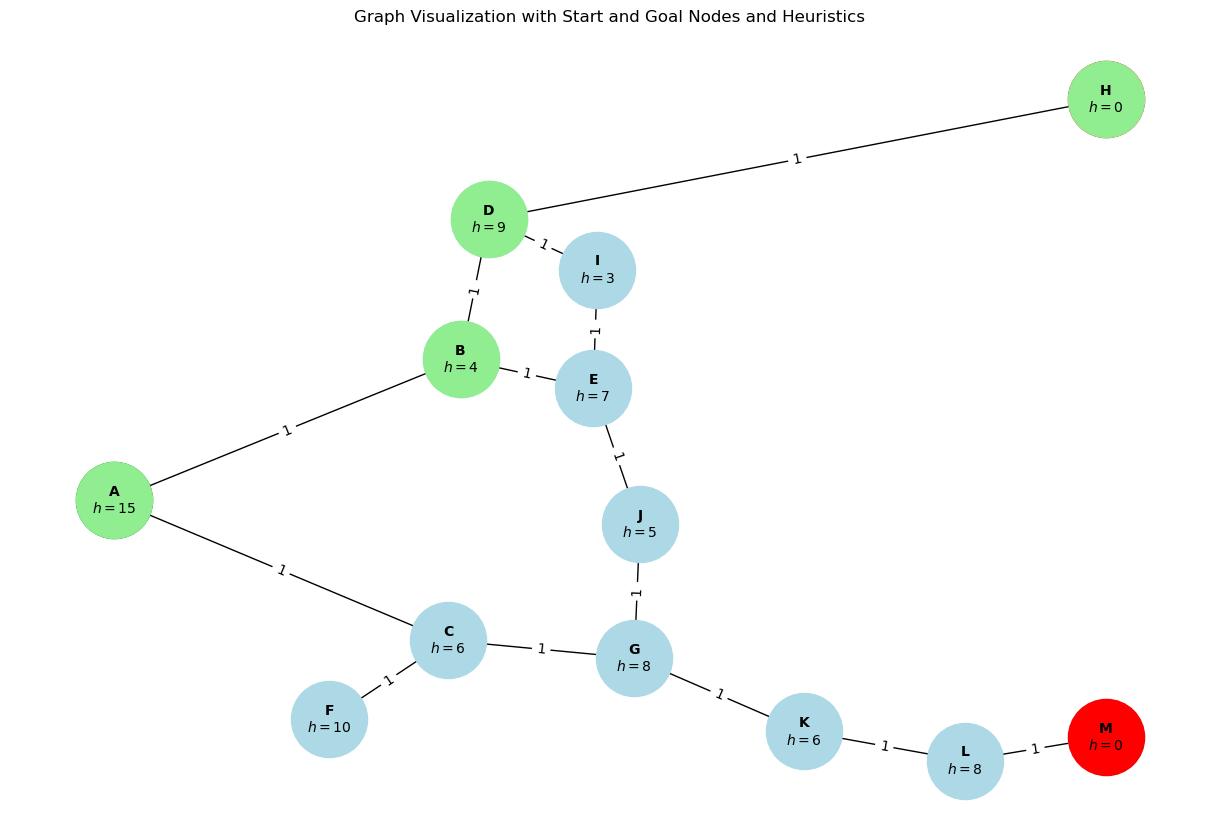

In [25]:
# Run A* algorithm
path = ga.a_star(graph, heuristics, start_node, goal_nodes)
ga.visualize_graph(graph, heuristics, start_node, goal_nodes, path_nodes=path)

## GBFS algorithm

Visiting node: A, h(n): 15, Path: ['A']
Visiting node: B, h(n): 4, Path: ['A', 'B']
Visiting node: C, h(n): 6, Path: ['A', 'C']
Visiting node: E, h(n): 7, Path: ['A', 'B', 'E']
Visiting node: I, h(n): 3, Path: ['A', 'B', 'E', 'I']
Visiting node: J, h(n): 5, Path: ['A', 'B', 'E', 'J']
Visiting node: G, h(n): 8, Path: ['A', 'B', 'E', 'J', 'G']
Visiting node: K, h(n): 6, Path: ['A', 'B', 'E', 'J', 'G', 'K']
Visiting node: L, h(n): 8, Path: ['A', 'B', 'E', 'J', 'G', 'K', 'L']
Visiting node: M, h(n): 0, Path: ['A', 'B', 'E', 'J', 'G', 'K', 'L', 'M']

Goal M reached! Path: ['A', 'B', 'E', 'J', 'G', 'K', 'L', 'M']
Visited nodes: ['A', 'B', 'C', 'E', 'I', 'J', 'G', 'K', 'L', 'M']



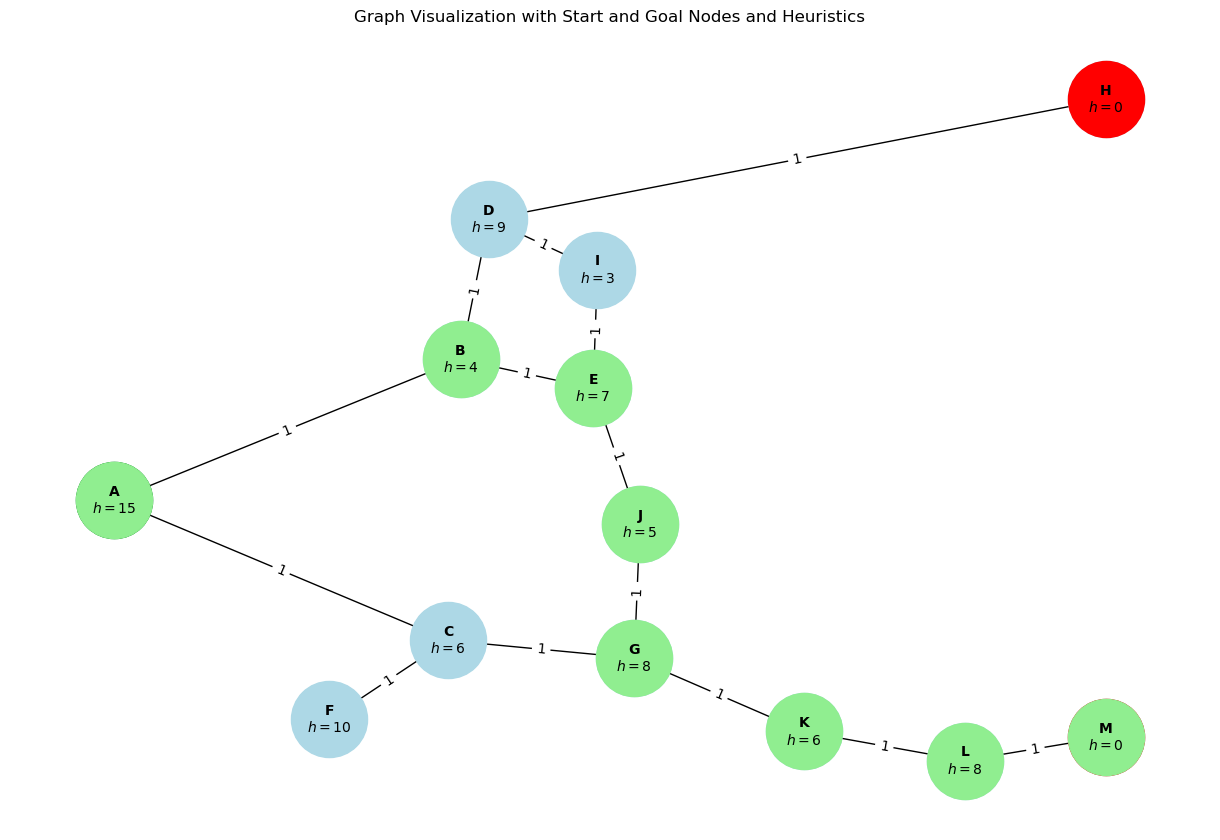

In [26]:
# Run GBFS algorithm
path = ga.gbfs(graph, heuristics, start_node, goal_nodes)
ga.visualize_graph(graph, heuristics, start_node, goal_nodes, path_nodes=path)

## Admissibility

In [27]:
# Compute shortest path costs and check admissibility
shortest_path_costs = ga.compute_shortest_path_costs(graph, goal_nodes)
is_admissible = ga.check_admissibility(heuristics, shortest_path_costs)
if is_admissible:
    print("The heuristic is admissible.")
else:
    print("The heuristic is not admissible.")

Heuristic is not admissible at node A: h(n) = 15 > actual cost = 3
Heuristic is not admissible at node B: h(n) = 4 > actual cost = 2
Heuristic is not admissible at node C: h(n) = 6 > actual cost = 4
Heuristic is not admissible at node D: h(n) = 9 > actual cost = 1
Heuristic is not admissible at node E: h(n) = 7 > actual cost = 3
Heuristic is not admissible at node F: h(n) = 10 > actual cost = 5
Heuristic is not admissible at node G: h(n) = 8 > actual cost = 3
Heuristic is not admissible at node I: h(n) = 3 > actual cost = 2
Heuristic is not admissible at node J: h(n) = 5 > actual cost = 4
Heuristic is not admissible at node K: h(n) = 6 > actual cost = 2
Heuristic is not admissible at node L: h(n) = 8 > actual cost = 1
The heuristic is not admissible.


# Adversarial search

## Graph definition

In [30]:
# Define the game tree for adversarial search
game_tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O'],
    'H': 6,
    'I': 4,
    'J': 3,
    'K': 1,
    'L': 1,
    'M': 2,
    'N': 5,
    'O': 4
}

## Minimax and best moves

In [31]:
# Calculate minimax value and best path
minimax_value, best_path = ga.minimax('A', game_tree, True)
print(f"Minimax value at the root node 'A': {minimax_value}")
print(f"Best path: {best_path}")
ga.display_minimax_tree(game_tree, best_path)

TypeError: minimax() takes 2 positional arguments but 3 were given